# Pseudorapidity

In this exercise it we will learn how pseudorapidities of muons that are detected in the CMS detector affect to the mass distribution.

As it was told in the theory part in week 2 notebook, pseudorapidity $\eta$ describes an angle $\theta$ of which the detected particle has differed from the particle beam (z-axis in Figure 1). As a function of $\theta$ (in radians), pseudorapidity is defined as

$$
\eta = -\ln(\tan(\frac{\theta}{2}))
$$

From Figure 1 we can see that a small pseudorapidity, in practice, means that the particle has differed a lot from the particle beam. Similarly, greater pseudorapidity means that the particle has continued almost among the beam line after the collision. In other words, when $\theta\longrightarrow0$ then $\eta\longrightarrow\infty$ and when $\theta\longrightarrow90^\circ$ then $\eta\longrightarrow0$.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 1: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

The image 2 below shows a situation where two particle beams from left and right collide. The image shows two muons with different pseudorapidities. The muon with the smaller pseudorapidity hits the barrel part of the detector when the muon with the greater pseudorapidity goes to the endcap of the detector. There are also muon chambers in the both ends of the detector so these muons can also be detected.

<figure>
    <img src="../images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Figure 2: Two particles with different pseudorapidities in the CMS detector.</figcaption>
</figure>

In this exercise your task is to draw two histograms. One shows such muon pairs that have small pseudorapidities and the other shows muon pairs with large pseudorapidities. We can then compare those histograms to see how pseudorapidity affects to the mass distributions.

## Part 1 - Pseudorapidity as a function of $\theta$

In order to see better how pseudorapidity $\eta$ and the angle $\theta$ are related, we can plot $\eta$ as a function of $\theta$. Write a function **pseudorapidity(theta)** that takes the **angle** theta **in degrees** as a parameter and **returns** the value of the **pseudorapidity**. Return your code to Moodle. Then use your function to plot the pseudorapidity for $\theta \in \mathopen[1^{\circ},179^{\circ}\mathclose]$. 

<br>

$\color{red}{\text{Write the code below}}$

$\color{red}{\text{Submit your function definition to exercise "Pseudorapidity" on Moodle.}}$

In [1]:
# plot pseudorapidity for theta=[1,179] degrees.

import numpy as np
import matplotlib.pyplot as plt

def pseudorapidity(theta):
    # argument theta in degrees
    theta = np.radians(theta)
    return -np.log(np.tan(theta/2))

In [2]:
print(round(pseudorapidity(1),2))
print(round(pseudorapidity(10),2))
print(round(pseudorapidity(45),2))
print(round(pseudorapidity(80),2))


4.74
2.44
0.88
0.18


In [3]:
# define a couple of fake cases for Moodle questions
# there will be a question where student has to pick the correct graph for pseudorapidity

# theta = np.linspace(1,179,179)

# # Fake answers for moodle question
# eta_fake1 = np.log(np.radians(theta)/8)
# eta_fake2 = np.abs(-np.log(np.tan(np.radians(theta)/2)))
# eta_fake3 = np.sin(np.radians(theta))

# etas = [pseudorapidity(theta), eta_fake1, eta_fake2, eta_fake3]

# n=0
# for eta in etas:
#     plt.figure()
#     plt.plot(theta_deg,eta)
#     plt.xlabel(r'$\theta (^{\circ})$')
#     plt.yticks([])
#     if n==0:
#         figname = 'pseudorapidity.png'
#     else:
#         figname = 'fake_pseudorapidity_{}.png'.format(n)
#     plt.savefig(figname)
#     n+=1

# plt.show()

## Part 2 - selecting events from data

Next we will select events from dataset 'DoubleMuRun2011A.csv'. Your task is to divide the dataset to events with small pseudorapidity and large pseudorapidity. Use events where muons have smaller pseudorapidity than 0.38 for small pseudorapidities and larger than 1.52 for large pseudorapidities. Save your datasets to variables 'small_etas' and 'large_etas'.

Note that $\eta$ can also be negative so remember to take the absolute value.

<br>

$\color{red}{\text{Write the code below}}$

In [4]:
# this cell will be visible in student notebook

# dataset = 

# lower_limit =
# upper_limit = 

# small_etas = 
# large_etas = 

# Print information of your datasets to see if they are about the same length

# print('Amount of all events = %d' % len(dataset))
# print('Amount of the events where the pseudorapidity of the both muons have been large: %d' %len(large_etas))
# print('Amount of the events where the pseudorapidity of the both muons have been small: %d' %len(small_etas))

In [5]:
# possible solution
import pandas as pd
import numpy as np

dataset = pd.read_csv('DoubleMuRun2011A.csv')

lower_limit = 0.38
upper_limit = 1.52
large_etas = dataset[(abs(dataset.eta1) > upper_limit) & (abs(dataset.eta2) > upper_limit)]
small_etas = dataset[(abs(dataset.eta1) < lower_limit) & (abs(dataset.eta2) < lower_limit)]

print('Amount of all events = %d' % len(dataset))
print('Amount of the events where the pseudorapidity of the both muons have been large: %d' %len(large_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small: %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large: 34263
Amount of the events where the pseudorapidity of the both muons have been small: 34337


## Part 3 - Plotting the histograms


Now that we have datasets for small and large etas, let's make histograms to compare the datasets. Again, we want to focus on a single peak. Check your invariant mass range from Moodle exercise **"Week 4 coding questions"**.

For your range of invariant masses:
1. Create distinct invariant mass histograms for both large and small eta datasets
1. Fit Breit-Wigner distribution to both histograms
1. Consider how pseudorapidity effects to the mass distribution (consider for example the decay width and lifetime of the particle)
1. Answer the questions in Moodle exercise "Week 4 coding questions"

<br>

$\color{red}{\text{Write the code below}}$

$\color{red}{\text{Answer the questions in exercise "Week 4 coding questions" on Moodle}}$

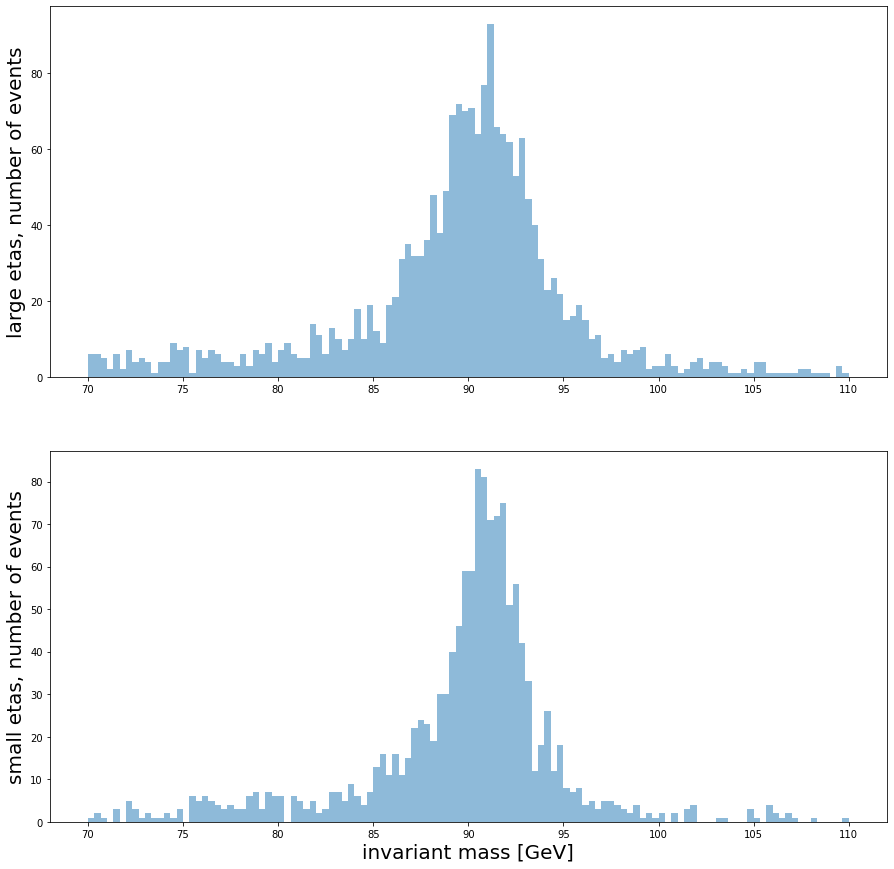

In [6]:
# possible solutions
inv_mass_large = large_etas['M']
inv_mass_small = small_etas['M']

f = plt.figure(figsize=(15,15))
plt.subplot(211)
hist_large, bins_large, patches = plt.hist(inv_mass_large, bins=120, range=(70,110), alpha=0.5)
plt.ylabel('large etas, number of events', fontsize=20)
plt.subplot(212)
hist_small, bins_small, patches = plt.hist(inv_mass_small, bins=120, range=(70,110), alpha=0.5)
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

In [7]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [8]:
def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
bins_large = bin_centers(bins_large)
bins_small = bin_centers(bins_small)

Iterations for large eta: 5
Iterations for small eta: 4
gamma = 5.414 +/- 0.197
M     = 90.751 +/- 0.056
a     = -0.101 +/- 0.032
b     = 9.467 +/- 2.944
A     = 663.605 +/- 21.157
gamma = 3.586 +/- 0.121
M     = 90.994 +/- 0.037
a     = -0.082 +/- 0.027
b     = 7.946 +/- 2.416
A     = 448.067 +/- 12.299


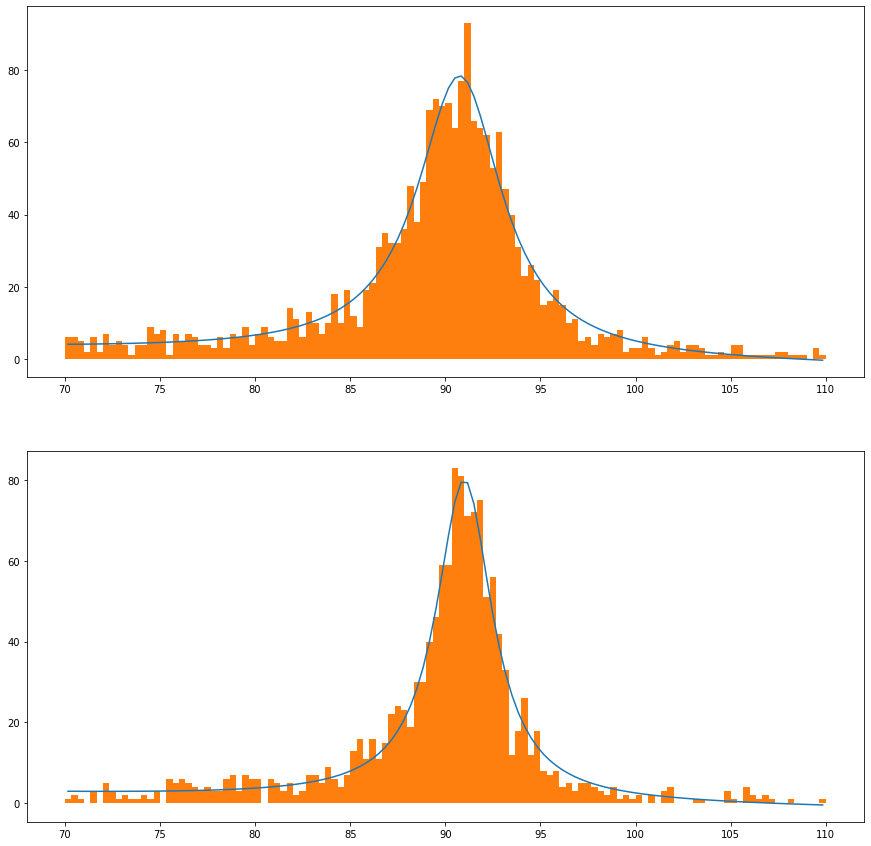

In [9]:
from scipy.optimize import curve_fit

accuracy = 1e-5
p0 = [5, 90, -1, 100, 100]
i_large = 1
i_small = 1
while True: # Loop until desired accuracy
    best_large, covariance_large = curve_fit(breitwigner, bins_large, hist_large, p0=p0)
    error_large = max(abs(p0-best_large))
    if error_large < accuracy: 
        break
    p0 = best_large
    i_large+=1
print("Iterations for large eta:", i_large)
    
while True: # Loop until desired accuracy
    best_small, covariance_small = curve_fit(breitwigner, bins_small, hist_small, p0=p0)
    error_small = max(abs(p0-best_small))
    if error_small < accuracy: 
        break
    p0 = best_small
    i_small+=1
print("Iterations for small eta:", i_small)
    
f = plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(bins_large, breitwigner(np.array(bins_large), *best_large))
plt.hist(inv_mass_large, bins=120, range=(70,110))
errors_large = np.sqrt(np.diag(covariance_large))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_large)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_large[i],errors_large[i],param_strings[i]))
    
plt.subplot(212)
plt.plot(bins_small, breitwigner(np.array(bins_small), *best_small))
plt.hist(inv_mass_small, bins=120, range=(70,110))
errors_small = np.sqrt(np.diag(covariance_small))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_small)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_small[i],errors_small[i],param_strings[i]))
plt.show()

In [11]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma_large = best_large[0]
error_gamma_large = errors_large[0]
tau_large = lifetime(gamma_large)
tau_minus_large = lifetime(gamma_large-error_gamma_large)
tau_plus_large = lifetime(gamma_large+error_gamma_large)
error_large = max(tau_minus_large-tau_large,tau_large-tau_plus_large)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_large,error_large))

gamma_small = best_small[0]
error_gamma_small = errors_small[0]
tau_small = lifetime(gamma_small)
tau_minus_small = lifetime(gamma_small-error_gamma_small)
tau_plus_small = lifetime(gamma_small+error_gamma_small)
error_small = max(tau_minus_small-tau_small,tau_small-tau_plus_small)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_small,error_small))

tau = 1.21585E-25 s +/- 4.58768E-27 s
tau = 1.83535E-25 s +/- 6.38883E-27 s


#### solution for J/psi

In [12]:
# possible solution
import pandas as pd
import numpy as np

dataset = pd.read_csv('DoubleMuRun2011A.csv')

lower_limit = 0.38
upper_limit = 1.52
large_etas = dataset[(abs(dataset.eta1) > upper_limit) & (abs(dataset.eta2) > upper_limit)]
small_etas = dataset[(abs(dataset.eta1) < lower_limit) & (abs(dataset.eta2) < lower_limit)]

print('Amount of all events = %d' % len(dataset))
print('Amount of the events where the pseudorapidity of the both muons have been large: %d' %len(large_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small: %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large: 34263
Amount of the events where the pseudorapidity of the both muons have been small: 34337


## Part 3 - Plotting the histograms


Now that we have datasets for small and large etas, let's make histograms to compare the datasets.

1. Create distinct invariant mass histograms for both large and small eta datasets
1. Fit Breit-Wigner distribution to both histograms
1. Considet how pseudorapidity effects to the mass distribution

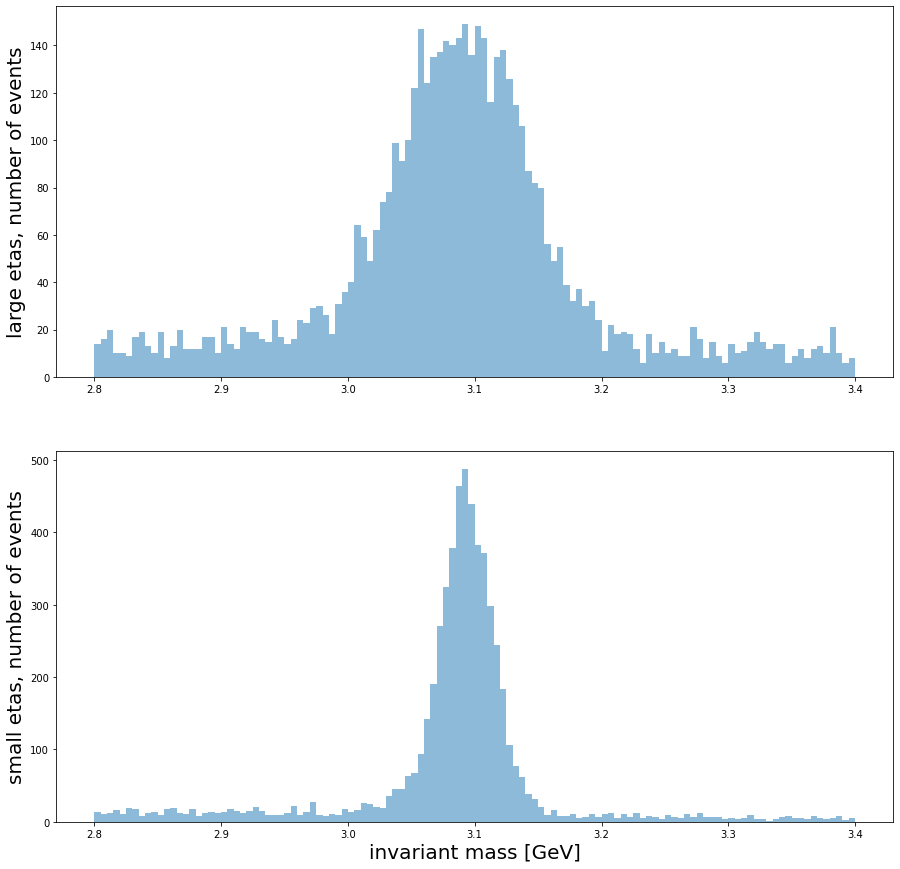

In [13]:
# possible solutions
inv_mass_large = large_etas['M']
inv_mass_small = small_etas['M']

f = plt.figure(figsize=(15,15))
plt.subplot(211)
hist_large, bins_large, patches = plt.hist(inv_mass_large, bins=120, range=(2.8,3.4), alpha=0.5)
plt.ylabel('large etas, number of events', fontsize=20)
plt.subplot(212)
hist_small, bins_small, patches = plt.hist(inv_mass_small, bins=120, range=(2.8,3.4), alpha=0.5)
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

In [14]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [15]:
def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")
        
bins_large = bin_centers(bins_large)
bins_small = bin_centers(bins_small)

gamma = 0.112 +/- 0.004
M     = 3.090 +/- 0.001
a     = -2.531 +/- 4.722
b     = 9.144 +/- 14.843
A     = 27.026 +/- 0.967
gamma = 0.040 +/- 0.001
M     = 3.094 +/- 0.000
a     = -15.442 +/- 7.536
b     = 47.363 +/- 23.449
A     = 30.944 +/- 0.626


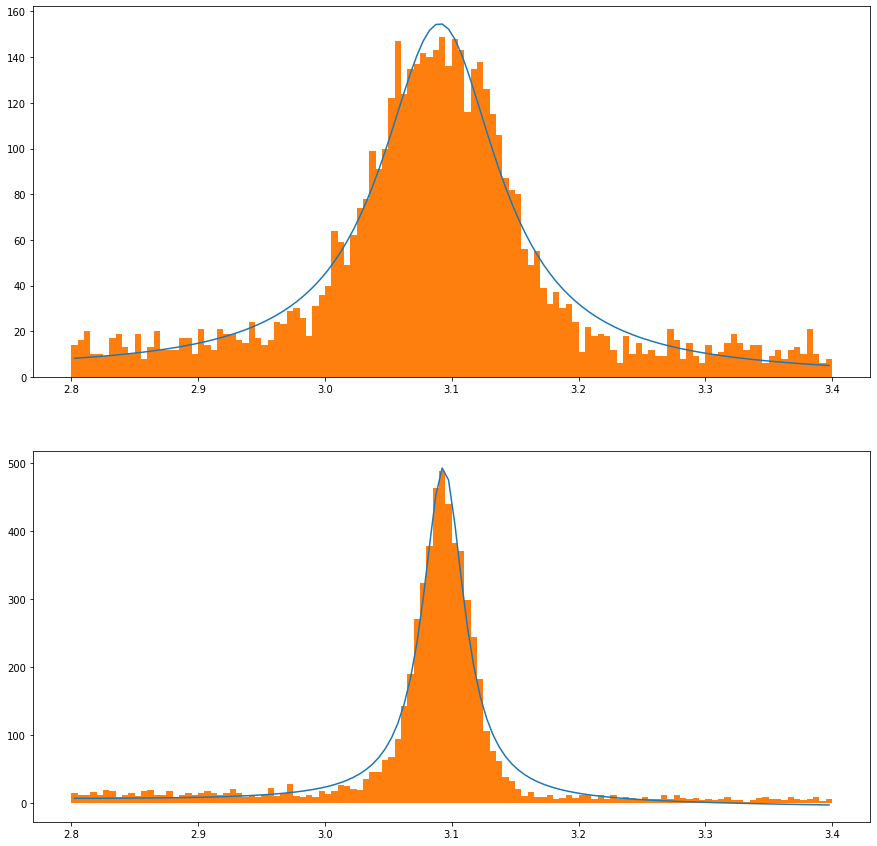

In [16]:
from scipy.optimize import curve_fit

accuracy = 1e-5
p0 = [0.2, 3, 1, 100, 100]
while True: # Loop until desired accuracy
    best_large, covariance_large = curve_fit(breitwigner, bins_large, hist_large, p0=p0)
    error = max(abs(p0-best_large))
    if error < accuracy: 
        break
    p0 = best_large
    
while True: # Loop until desired accuracy
    best_small, covariance_small = curve_fit(breitwigner, bins_small, hist_small, p0=p0)
    error = max(abs(p0-best_small))
    if error < accuracy: 
        break
    p0 = best_small
    
f = plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(bins_large, breitwigner(np.array(bins_large), *best_large))
plt.hist(inv_mass_large, bins=120, range=(2.8,3.4))
errors_large = np.sqrt(np.diag(covariance_large))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_large)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_large[i],errors_large[i],param_strings[i]))
    
plt.subplot(212)
plt.plot(bins_small, breitwigner(np.array(bins_small), *best_small))
plt.hist(inv_mass_small, bins=120, range=(2.8,3.4))
errors_small = np.sqrt(np.diag(covariance_small))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best_small)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best_small[i],errors_small[i],param_strings[i]))
plt.show()

In [18]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma_large = best_large[0]
error_gamma_large = errors_large[0]
tau_large = lifetime(gamma_large)
tau_minus_large = lifetime(gamma_large-error_gamma_large)
tau_plus_large = lifetime(gamma_large+error_gamma_large)
error_large = max(tau_minus_large-tau_large,tau_large-tau_plus_large)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_large,error_large))

gamma_small = best_small[0]
error_gamma_small = errors_small[0]
tau_small = lifetime(gamma_small)
tau_minus_small = lifetime(gamma_small-error_gamma_small)
tau_plus_small = lifetime(gamma_small+error_gamma_small)
error_small = max(tau_minus_small-tau_small,tau_small-tau_plus_small)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau_small,error_small))

print(lifetime(1.3e-3))

tau = 5.86393E-24 s +/- 2.28830E-25 s
tau = 1.65324E-23 s +/- 4.36744E-25 s
5.06316889923077e-22


Multiple choice questions for moodle:

1. How does the pseudorapidity affect the mass distribution?
    1. When $\eta$ is smaller, the distribution is more accurate (x)
    1. When $\eta$ is larger, the distribution is more accurate
    1. The effect seems to be random
    1. Pseudorapidity has no effect on the mass distribution


## Extra: CMS dimuon invariant mass graph reconstructed

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data and the invariant mass 
ds = pd.read_csv('DoubleMuRun2011A.csv')
M = ds.M
M2 = np.log10(M)
bins = int(max(M)) # to get number of events per GeV

plt.figure()
plt.hist(M2, bins=bins, log=True, weights = bins/M,histtype='step',color='k',linewidth=2)
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events / GeV')
ticks = [1,10,100]
plt.xticks(np.log10(ticks),ticks)
plt.show()